## Using profile plotter with Endelave data

- This short tutorial indicates how to create TEM profiles.
- It handles the importing of tTEM, sTEM and borehole data.
- Profile transects can also be supplied as numpy arrays, or can be read from .shp or .csv files

The plotting tool is set around a model object and a plotting object. The model object first needs to be created. In theory, the model object can be populated with ERT/NMR/IP model data, this will come in future versions.


In [1]:
# import necessary packages
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

sys.path.append('../src/profiler')
import profiler as profiler

C:\Users\au701230\AppData\Local\Programs\Python\Python39\lib\site-packages\requests-2.26.0-py3.9.egg\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.8) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# set matplotlib font size

font = {'size': 10}

matplotlib.rc('font', **font)

In [3]:
# set paths to data files

ttem_path = "../data/tem/Endelave_tTEM.xyz"
walktem_path = "../data/tem/Endelave_walkTEM.xyz"


In [4]:
# create model object
model = profiler.Model()

# populate model object with dictionaries of ttem data
model.loadXYZ(ttem_path, mod_name='Endelave_tTEM')



In [5]:
model.tem_models
model.boreholes

[]

In [6]:
def getModelInfo(model):
    
    print("You have %d models(s)." % len(model.tem_models))

    for i in range(len(model.tem_models)):

        print("Model %d has %d %s sounding(s), each with %d layers." % (i, model.tem_models[i]['rhos'].shape[0], model.tem_models[i]['instrument'], model.tem_models[i]['rhos'].shape[1]))
        
getModelInfo(model)

You have 1 models(s).
Model 0 has 24342 TTEM sounding(s), each with 30 layers.


In [7]:
# you can also check the structure of the model as follows
model.tem_models

[{'instrument': 'TTEM',
  'epsg': 'epsg:32632',
  'mod_name': 'Endelave_tTEM',
  'x': array([582013.    , 582006.25  , 581998.875 , ..., 582715.25  ,
         582721.5   , 582737.9375]),
  'y': array([6179134.5, 6179138.5, 6179144.5, ..., 6182913.5, 6182906. ,
         6182889. ]),
  'elev': array([3.2, 3.2, 3.2, ..., 1.1, 1.2, 1.1]),
  'rhos': array([[41.38, 41.93, 43.29, ..., 21.45, 27.39, 31.65],
         [41.76, 42.36, 43.71, ..., 21.47, 27.42, 31.82],
         [42.6 , 43.23, 44.52, ..., 21.45, 27.4 , 31.77],
         ...,
         [15.38, 15.04, 15.79, ..., 23.86, 29.7 , 33.89],
         [15.63, 14.95, 15.54, ..., 23.79, 29.58, 33.82],
         [13.33, 12.99, 13.92, ..., 24.02, 29.6 , 33.73]]),
  'depths': array([[  1.   ,   2.088,   3.272, ...,  99.587, 109.361, 120.001],
         [  1.   ,   2.088,   3.272, ...,  99.587, 109.361, 120.001],
         [  1.   ,   2.088,   3.272, ...,  99.587, 109.361, 120.001],
         ...,
         [  1.   ,   2.088,   3.272, ...,  99.587, 109.36

In [8]:
# now we add the walkTEM data, we could also add additional ttem models if we wanted
model.loadXYZ(walktem_path, mod_name='walkTEM_Endelave')

getModelInfo(model) #the name of the instrument is given by the output of workbench

You have 2 models(s).
Model 0 has 24342 TTEM sounding(s), each with 30 layers.
Model 1 has 49 TEMCL sounding(s), each with 20 layers.


### Adding borehole data
the borehole data can be stored in a text file (.dat) or an excel file (.xlsx).
the .dat file should contain a row for each lithology
the .dat file should be tab delimited and should have the headers:

id | utm_x | utm_y | elev | top_depths | bot_depths | lith_names | colors | lith_descriptions

- id is the borehole name, it can be used to label on the TEM profiles
- utm_x and utm_y are the utm coordinates
- elev is the ground elevation, in most cases this will be ignored by the plotting routine, instead the elevation will be gained from the TEM models
- top_depths is the top depth of the layer, relative to ground level. That is, the first layer should have a top_depth of 0 m.
- bot_depths is the bottom depth of the layer, again relative to the ground level.
- lith_names is the lithology name
- colors is the color to be used for plotting, standard python colors (https://matplotlib.org/stable/gallery/color/named_colors.html) and hex codes will work.
- the lith_descriptions contain a description of the layer, it can be left empty but the header should be there.



In [9]:
# get a list of all the borehole paths
borehole_paths = glob("../data/boreholes"+"/*.dat")

model.loadBoreholes(borehole_paths)

In [10]:
# boreholes are stored as a list of dictionaries, the endelave ones are taken directly from jupiter databases.
model.boreholes[0]

{'id': 118.1,
 'n_layers': 5,
 'x': 580999.0,
 'y': 6179652.0,
 'elevation': 5.44,
 'top_depths': array([ 0. ,  3. , 13. , 16.5, 30.5]),
 'bot_depths': array([ 3. , 13. , 16.5, 30.5, 33.5]),
 'colors': array(['yellow', 'yellow', '#D9CE96', 'darkgoldenrod', 'deepskyblue'],
       dtype=object),
 'descriptions': 0       senglacial freshwater sand
 1          glacial meltwater sands
 2           glacial meltwater silt
 3      glacial moraines (claytill)
 4    small belt clay, plastic clay
 Name: lith_descriptions, dtype: object,
 'lith_names': array(['Sand', 'Sand', 'Silt', 'Clay', 'Clay'], dtype=object)}

### Adding profile coordinates
the profile data can be stored in a text file (.csv) or an shape file (.shp).
the .dat file should contain a row for each lithology
the .dat file should be tab delimited and should have the headers:

id | utm_x | utm_y | elev | top_depths | bot_depths | lith_names | colors | lith_descriptions

- id is the borehole name, it can be used to label on the TEM profiles
- utm_x and utm_y are the utm coordinates
- elev is the ground elevation, in most cases this will be ignored by the plotting routine, instead the elevation will be gained from the TEM models
- top_depths is the top depth of the layer, relative to ground level. That is, the first layer should have a top_depth of 0 m.
- bot_depths is the bottom depth of the layer, again relative to the ground level.
- lith_names is the lithology name
- colors is the color to be used for plotting, standard python colors (https://matplotlib.org/stable/gallery/color/named_colors.html) and hex codes will work.
- the lith_descriptions contain a description of the layer, it can be left empty but the header should be there.



In [11]:
prof_coord_paths = glob('../data/profiles' + '/prof*.csv')
model.loadProfileCoords(prof_coord_paths, file_type='csv')

# we will load the last profile again so that we can check some of the settings below, the function expects a list...
model.loadProfileCoords([prof_coord_paths[-1]], file_type='csv')

In [12]:
model.createProfiles(model_idx=0, profile_idx = 'all', interp_radius=50, model_spacing=30) 

C:\Users\au701230\OneDrive - Aarhus Universitet\Desktop\pyTEM\pyTEM2\profiler\tutorial\../src/profiler\profiler.py:310: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights, axis=0)


In [13]:
model.createProfiles(model_idx=0, profile_idx = [-1], interp_radius=50, model_spacing=100) 

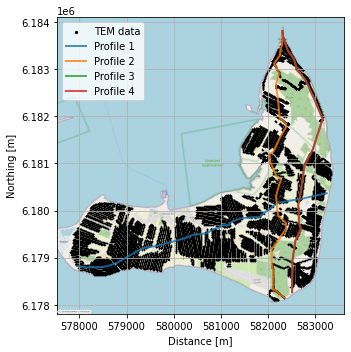

In [14]:
# Now we can create a plot object to plot the models
# background can be 'imagery' or 'osm'
plot = profiler.Plot(model)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

plot.profileMap(ax=ax, background='osm')
#plot.profileMap(ax=ax, background='imagery')

fig.tight_layout()

Borehole 118.1 is 0.013 km from profile, it was included.
Borehole 118.11 is 0.835 km from profile, it was not included.
Borehole 118.12 is 0.561 km from profile, it was not included.
Borehole 118.13 is 0.754 km from profile, it was not included.
Borehole 118.39 is 0.053 km from profile, it was included.
Borehole 118.4 is 0.836 km from profile, it was not included.
Borehole 118.41 is 1.111 km from profile, it was not included.
Borehole 118.42 is 0.540 km from profile, it was not included.
Borehole 118.43 is 0.689 km from profile, it was not included.
Borehole 118.44 is 0.807 km from profile, it was not included.
Borehole 118.45 is 1.153 km from profile, it was not included.
Borehole 118.47 is 0.096 km from profile, it was included.
Borehole 118.48 is 0.583 km from profile, it was not included.
Borehole 118.53 is 0.584 km from profile, it was not included.
Borehole 118.54 is 0.579 km from profile, it was not included.
Borehole 118.56 is 0.586 km from profile, it was not included.
Boreho

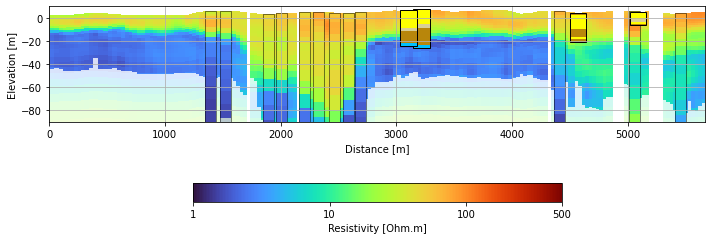

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

scale = 10
vmin=1; vmax=500
plot.TEMProfile(profile_idx=0, cmap=plt.cm.turbo, zmin=-90, zmax=10, ax=ax, scale=scale, cbar_orientation='horizontal', vmax=vmax)
plot.addTEMSoundings(profile_idx=0, model_idx=1, search_radius=100, ax=ax, print_msg=False, vmax=vmax)
plot.addBoreholes(model_idx=0, ax=ax, print_msg=True)

In [17]:
#fig, ax = plt.subplots(1, 1, figsize=(3,3))
#plot.lithKey(ax=ax)

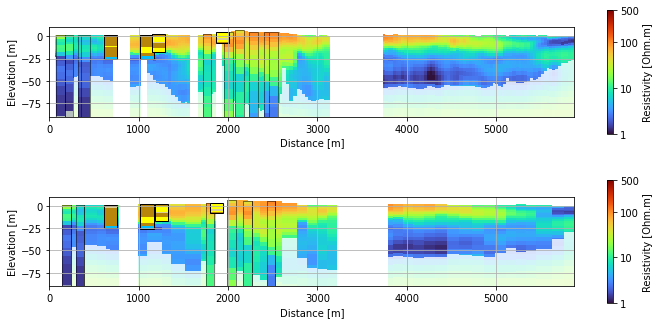

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(10,5))
scale = 10
vmin=1; vmax=500

plot.TEMProfile(profile_idx=-2, cmap=plt.cm.turbo, zmin=-90, zmax=10, ax=axs[0], scale=scale, vmax=vmax)
plot.addTEMSoundings(profile_idx=-2, model_idx=1, search_radius=100, ax=axs[0], print_msg=False, vmax=vmax)
plot.addBoreholes(model_idx=-2, ax=axs[0], print_msg=False)

plot.TEMProfile(profile_idx=-1, cmap=plt.cm.turbo, zmin=-90, zmax=10, ax=axs[1], scale=scale, vmax=vmax)
plot.addTEMSoundings(profile_idx=-1, model_idx=1, search_radius=100, ax=axs[1], print_msg=False, vmax=vmax)
plot.addBoreholes(model_idx=-1, ax=axs[1], print_msg=False)

In [20]:
bh_idx = 0
model_idx = 0
dist_threshold = 100

bh_idxs = []
sounding_idxs = []
for i, bh in enumerate(model.boreholes):
    min_dist, sounding_idx = plot.findNearest(bh, model.profiles[model_idx]['x'], model.profiles[model_idx]['y'])[2:]
    
    if min_dist < dist_threshold:
        bh_idxs.append(i)
        sounding_idxs.append(sounding_idx)

print('%d boreholes were sucessfuly paired with a TEM sounding' % len(bh_idxs))

4 boreholes were sucessfuly paired with a TEM sounding


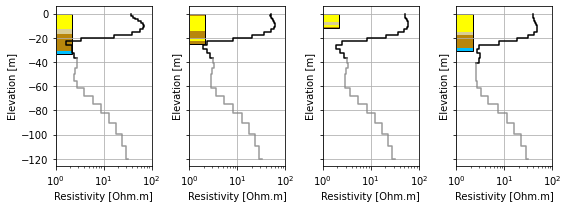

In [21]:
if len(bh_idxs) > 4:
    ncols = len(bh_idxs) // 2
    nrows = 2
    fig, axs = plt.subplots(nrows, ncols, figsize=(2*ncols,3*nrows))

else:
    ncols = len(bh_idxs)
    fig, axs = plt.subplots(1, ncols, figsize=(2*ncols,3), sharex=True, sharey=True)

axs = axs.flatten()

for i, ax in enumerate(axs):
    
    plot.TEMSounding(model_idx=0, sounding_idx=sounding_idxs[i], ax=ax, vmax=100)

    plot.addBorehole(bh_idx=bh_idxs[i], ax=ax, bh_width=0.17)

fig.tight_layout()